In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models


2025-09-16 08:15:10.928531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758010511.248708      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758010511.333959      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")   # 10 digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-16 08:15:29.817882: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=32)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8561 - loss: 0.4504 - val_accuracy: 0.9862 - val_loss: 0.0460
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9751 - loss: 0.0896 - val_accuracy: 0.9892 - val_loss: 0.0373
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9814 - loss: 0.0627 - val_accuracy: 0.9910 - val_loss: 0.0337
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9882 - loss: 0.0401 - val_accuracy: 0.9920 - val_loss: 0.0301


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9900 - loss: 0.0317
Test Accuracy: 0.9922000169754028


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Digit: 7


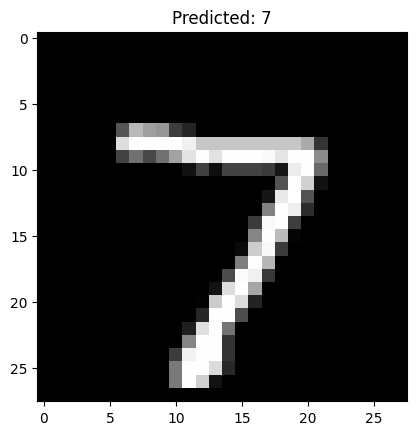

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sample = x_test[0].reshape(1,28,28,1)
pred = model.predict(sample)
print("Predicted Digit:", np.argmax(pred))

plt.imshow(x_test[0].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {np.argmax(pred)}")
plt.show()